In [ ]:
Shape of total reads vs unique reads. Color code better for all 12 experiments 
Sample all to same depth  then DO size distribution. To make sure all have same read distribution. 

Coverage plots  for a few chromosomes . 


In [7]:
install.packages("RColorBrewer")

Installing package into ‘/data/R-library/3.2’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib”Warning message:
“package ‘RColorBrewer’ is not available (for R version 3.2.0)”

In [8]:
library(RColorBrewer)

In [91]:
#color_vector.v = rainbow(12)
#color.v = rainbow(12)

total_t.l = vector("list", length=12)
unique_t.l = vector("list", length=12)
percent_t.l = vector("list", length=12)

total.v = c(36297718,39831415,32054265,29486121, 12473454, 16557222, 12874914, 20038281, 17313771,15160887,15670284,9839379)
  #c(12473454, 16557222, 12874914, 20038281,  40950850, 40483904) #15 pcr plus inputs)

  #c(17313771,15160887,15670284,9839379, 40950850, 40483904) #17pcr plus inputs
#c(29787225, 31718109, 28545198, 29877660, 40950850, 40483904) #merged plus inputs

#c(36297718,39831415,32054265,29486121) # dec2016 


expe= "dec_2016"
#setwd("~/Dros_MNase_datasets/")

# List of data set names
dm_id_total.v = c('EdU5min Nascent total DEC2016', 'EdU5min Mature total DEC2016','EdU10min Nascent total DEC2016',
                  'EdU10min Mature total DEC2016','EdU5min Nascent total 15PCR', 'EdU5min Mature total 15PCR ',
            'EdU10min Nascent total 15PCR', 'EdU10min Mature total 15PCR',
           'EdU5min Nascent total 17PCR', 'EdU5min Mature total 17PCR',
            'EdU10min Nascent total 17PCR', 'EdU10min Mature total 17PCR')

dm_id_unique.v = c('EdU5min Nascent unique DEC2016','EdU5min Mature unique DEC2016',
            'EdU10min Nascent unique DEC2016', 'EdU10min Mature unique DEC2016',
           'EdU5min Nascent unique 15PCR', 'EdU5min Mature unique 15PCR',
            'EdU10min Nascent unique 15PCR', 'EdU10min Mature unique 15PCR',
           'EdU5min Nascent unique 17PCR', 'EdU5min Mature unique 17PCR',
            'EdU10min Nascent unique 17PCR', 'EdU10min Mature total 17PCR','EdU10min Mature unique 17PCR')

#bamfile names
dm_id_p.v = c('754', '755', '756', '757', '758','759','760','761','762','763','764','765')

directory = ("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/merged_bam_files/uniqueness_analysis/")

ind = 0

# Read in csv files with counts by chromatin
for(i in 1:12) {
  ind = ind + 1
  fragment_length_table = read.csv(file = paste("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/merged_bam_files/uniqueness_analysis/",dm_id_p.v[i], "_fragment_length_complexity.csv", sep=""))
  
  # Sum total reads at each position
  total.t = matrix(0, nrow=230, ncol=2)
  total.t[,1] = fragment_length_table[1:230,1]
  for(h in seq(2, 28, by=2)) {
    total.t[,2] = total.t[,2] + fragment_length_table[1:230,h]
  }
  
  # Sum unique reads at each position
  unique.t = matrix(0, nrow=230, ncol=2)
  unique.t[,1] = fragment_length_table[1:230,1]
  for(j in seq(3, 29, by=2)) {
    unique.t[,2] = unique.t[,2] + fragment_length_table[1:230,j]
  }
  
  total.t[,2] = total.t[,2] / total.v[ind]
  unique.t[,2] = unique.t[,2] / total.v[ind]
  
  # Get percent uniqueness at each position
  percent.t = matrix(0, nrow=230, ncol=2)
  percent.t[,1] = fragment_length_table[1:230,1]
  percent.t[,2] = unique.t[,2] / total.t[,2]
  
  total_t.l[[ind]] = total.t
  unique_t.l[[ind]] = unique.t
  percent_t.l[[ind]] = percent.t
  
  #png(file = paste(directory,"unique_read_lengths_", dm_id_p.v[i], ".png", sep=""), width = 20, height = 20, units = "in", res = 100)
  #par(cex=1.5)
  #plot(total.t, type="l", lwd=2, xlab="Fragment length", ylab="Counts", ylim=range(total.t))
  #lines(unique.t, type='l', lwd=2, lty=2)
  #dev.off()
  
  #png(file = paste(directory,"percent_unique_", dm_id_p.v[i], ".png", sep=""), width = 20, height = 20, units = "in", res = 100)
  #par(cex=1.5)
  #plot(percent.t, type="l", lwd=2, xlab="Fragment length", ylab="Percent unique", ylim=c(0,1))
  #dev.off()
}

#Get max value for each column in total_t.l
get_max = function(list_name){
  
  # Get the max of the column you want
  max_col = max(list_name[,2])
  
  # Return max
  return(max_col)
}

max.l = lapply(total_t.l, get_max)
y_max = max(unlist(max.l))

In [83]:
color_vector5.v

[1] "#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#3182BD" "#08519C"

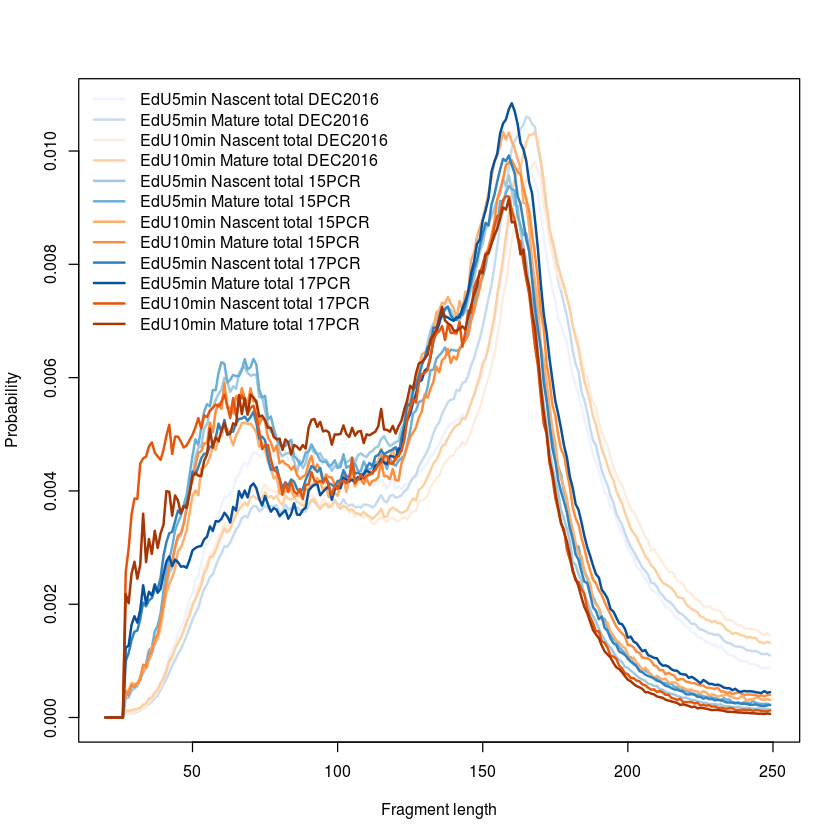

In [85]:
color_vector5.v = brewer.pal(6, "Blues")
color_vector10.v = brewer.pal(6, "Oranges")
color5.v = brewer.pal(6, "Blues")
color10.v = brewer.pal(6, "Oranges")
#color_vector.v = rainbow(12)
#color.v = rainbow(12)


#png(file = paste(directory,"unique_read_lengths_assembly",expe,".png", sep=""), width=20, height=20, units="in", res=100)
par(cex=0.8)
plot(0, 0, type="n", xlab="Fragment length", ylab="Probability", xlim=c(20, 250), ylim=c(0, y_max))
legend(x = "topleft", legend = dm_id_total.v, col = c(color5.v[1],color5.v[2], color10.v[1], color10.v[2], 
                                                             color5.v[3],color5.v[4], color10.v[3], color10.v[4],
                                                             color5.v[5],color5.v[6], color10.v[5], color10.v[6]),
       lwd = 2, lty=c(1,1,1,1,1,1,1,1,1,1,1,1), bty = "n")
lines(total_t.l[[1]], type='l', col = color_vector5.v[1], lwd=2)
lines(total_t.l[[2]], type='l', col = color_vector5.v[2], lwd=2)
lines(total_t.l[[3]], type='l', col = color_vector10.v[1], lwd=2)
lines(total_t.l[[4]], type='l', col = color_vector10.v[2], lwd=2)
lines(total_t.l[[5]], type='l', col = color_vector5.v[3], lwd=2)
lines(total_t.l[[6]], type='l', col = color_vector5.v[4], lwd=2)
lines(total_t.l[[7]], type='l', col = color_vector10.v[3], lwd=2)
lines(total_t.l[[8]], type='l', col = color_vector10.v[4], lwd=2)
lines(total_t.l[[9]], type='l', col = color_vector5.v[5], lwd=2)
lines(total_t.l[[10]], type='l', col = color_vector5.v[6], lwd=2)
lines(total_t.l[[11]], type='l', col = color_vector10.v[5], lwd=2)
lines(total_t.l[[12]], type='l', col = color_vector10.v[6], lwd=2)


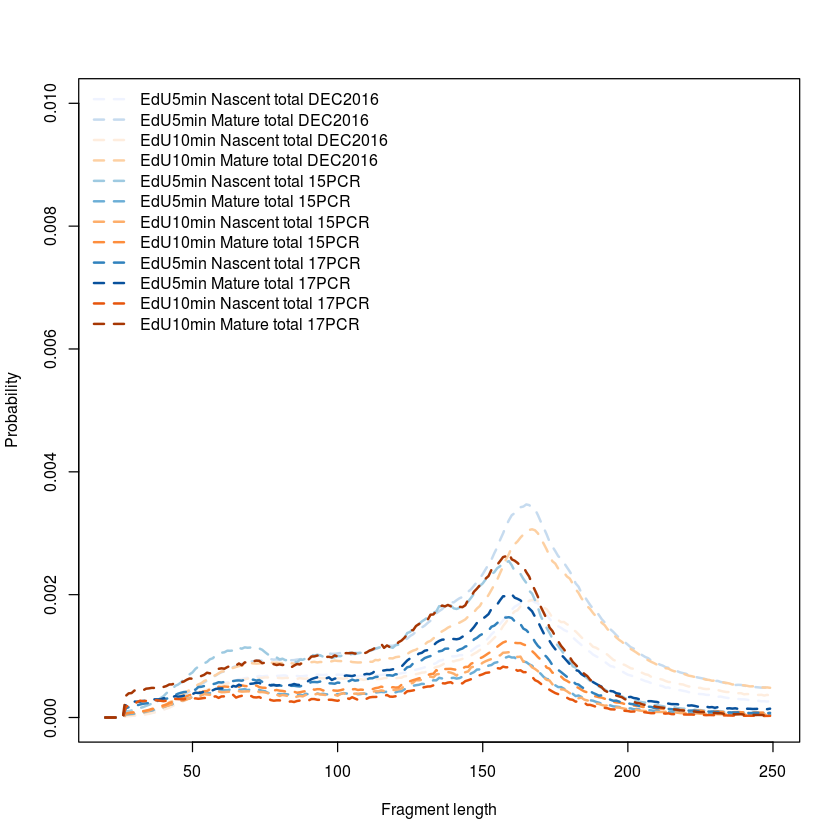

In [88]:


par(cex=0.8)
plot(0, 0, type="n", xlab="Fragment length", ylab="Probability", xlim=c(20, 250), ylim=c(0, 0.010))
legend(x = "topleft", legend = dm_id_total.v, col = c(color5.v[1],color5.v[2], color10.v[1], color10.v[2], 
                                                             color5.v[3],color5.v[4], color10.v[3], color10.v[4],
                                                             color5.v[5],color5.v[6], color10.v[5], color10.v[6]),
       lwd = 2, lty=c(2,2,2,2,2,2,2,2,2,2,2,2), bty = "n")
lines(unique_t.l[[1]], type='l', col = color_vector5.v[1], lwd=2, lty=2)
lines(unique_t.l[[2]], type='l', col = color_vector5.v[2], lwd=2, lty=2)
lines(unique_t.l[[3]], type='l', col = color_vector10.v[1], lwd=2, lty=2)
lines(unique_t.l[[4]], type='l', col = color_vector10.v[2], lwd=2, lty=2)
lines(unique_t.l[[5]], type='l', col = color_vector5.v[3], lwd=2, lty=2)
lines(unique_t.l[[6]], type='l', col = color_vector5.v[4], lwd=2, lty=2)
lines(unique_t.l[[7]], type='l', col = color_vector10.v[3], lwd=2, lty=2)
lines(unique_t.l[[8]], type='l', col = color_vector10.v[4], lwd=2, lty=2)
lines(unique_t.l[[9]], type='l', col = color_vector5.v[5], lwd=2, lty=2)
lines(unique_t.l[[10]], type='l', col = color_vector5.v[6], lwd=2, lty=2)
lines(unique_t.l[[11]], type='l', col = color_vector10.v[5], lwd=2, lty=2)
lines(unique_t.l[[12]], type='l', col = color_vector10.v[6], lwd=2, lty=2)

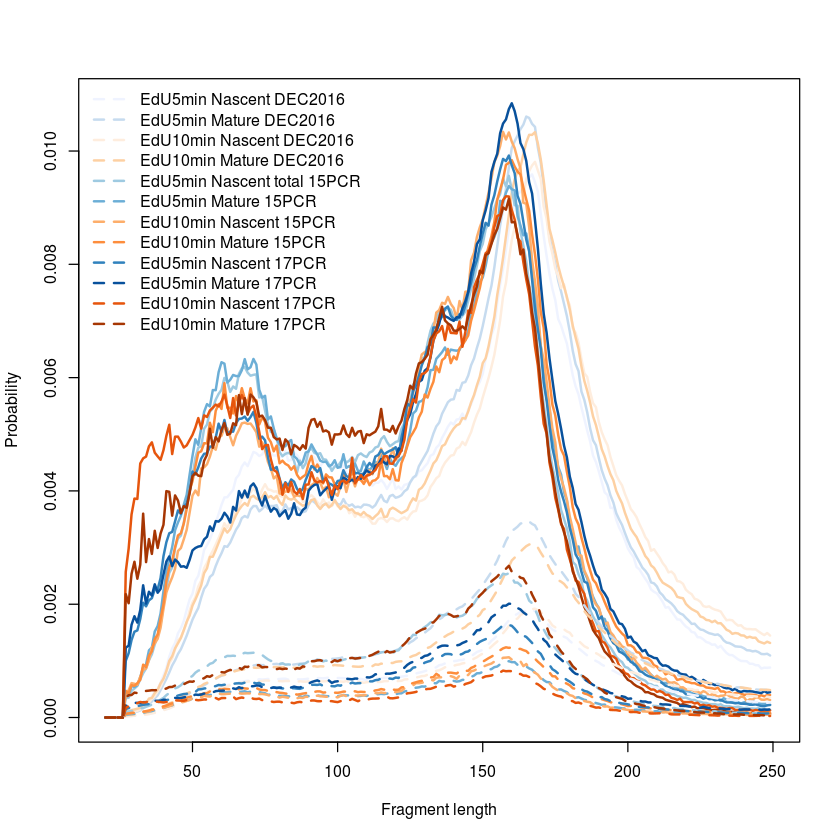

In [89]:
color_vector5.v = brewer.pal(6, "Blues")
color_vector10.v = brewer.pal(6, "Oranges")
color5.v = brewer.pal(6, "Blues")
color10.v = brewer.pal(6, "Oranges")

dm_id.v =c('EdU5min Nascent DEC2016', 'EdU5min Mature DEC2016','EdU10min Nascent DEC2016',
                  'EdU10min Mature DEC2016','EdU5min Nascent total 15PCR', 'EdU5min Mature 15PCR ',
            'EdU10min Nascent 15PCR', 'EdU10min Mature 15PCR',
           'EdU5min Nascent 17PCR', 'EdU5min Mature 17PCR',
            'EdU10min Nascent 17PCR', 'EdU10min Mature 17PCR')


#png(file = paste(directory,"unique_read_lengths_assembly",expe,".png", sep=""), width=20, height=20, units="in", res=100)
par(cex=0.8)
plot(0, 0, type="n", xlab="Fragment length", ylab="Probability", xlim=c(20, 250), ylim=c(0, y_max))
legend(x = "topleft", legend = dm_id.v, col = c(color5.v[1],color5.v[2], color10.v[1], color10.v[2], 
                                                             color5.v[3],color5.v[4], color10.v[3], color10.v[4],
                                                             color5.v[5],color5.v[6], color10.v[5], color10.v[6],
                                               color5.v[1],color5.v[2], color10.v[1], color10.v[2], 
                                                             color5.v[3],color5.v[4], color10.v[3], color10.v[4],
                                                             color5.v[5],color5.v[6], color10.v[5], color10.v[6]),
       lwd = 2, lty=c(2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2), bty = "n")
lines(total_t.l[[1]], type='l', col = color_vector5.v[1], lwd=2)
lines(total_t.l[[2]], type='l', col = color_vector5.v[2], lwd=2)
lines(total_t.l[[3]], type='l', col = color_vector10.v[1], lwd=2)
lines(total_t.l[[4]], type='l', col = color_vector10.v[2], lwd=2)
lines(total_t.l[[5]], type='l', col = color_vector5.v[3], lwd=2)
lines(total_t.l[[6]], type='l', col = color_vector5.v[4], lwd=2)
lines(total_t.l[[7]], type='l', col = color_vector10.v[3], lwd=2)
lines(total_t.l[[8]], type='l', col = color_vector10.v[4], lwd=2)
lines(total_t.l[[9]], type='l', col = color_vector5.v[5], lwd=2)
lines(total_t.l[[10]], type='l', col = color_vector5.v[6], lwd=2)
lines(total_t.l[[11]], type='l', col = color_vector10.v[5], lwd=2)
lines(total_t.l[[12]], type='l', col = color_vector10.v[6], lwd=2)
lines(unique_t.l[[1]], type='l', col = color_vector5.v[1], lwd=2, lty=2)
lines(unique_t.l[[2]], type='l', col = color_vector5.v[2], lwd=2, lty=2)
lines(unique_t.l[[3]], type='l', col = color_vector10.v[1], lwd=2, lty=2)
lines(unique_t.l[[4]], type='l', col = color_vector10.v[2], lwd=2, lty=2)
lines(unique_t.l[[5]], type='l', col = color_vector5.v[3], lwd=2, lty=2)
lines(unique_t.l[[6]], type='l', col = color_vector5.v[4], lwd=2, lty=2)
lines(unique_t.l[[7]], type='l', col = color_vector10.v[3], lwd=2, lty=2)
lines(unique_t.l[[8]], type='l', col = color_vector10.v[4], lwd=2, lty=2)
lines(unique_t.l[[9]], type='l', col = color_vector5.v[5], lwd=2, lty=2)
lines(unique_t.l[[10]], type='l', col = color_vector5.v[6], lwd=2, lty=2)
lines(unique_t.l[[11]], type='l', col = color_vector10.v[5], lwd=2, lty=2)
lines(unique_t.l[[12]], type='l', col = color_vector10.v[6], lwd=2, lty=2)

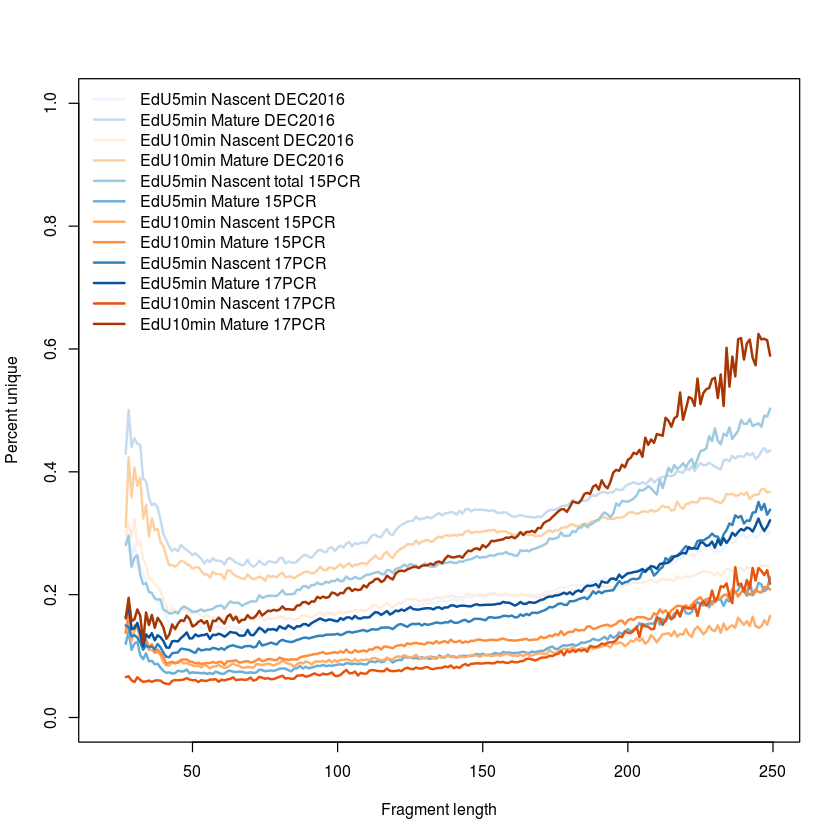

In [93]:
color_vector5.v = brewer.pal(6, "Blues")
color_vector10.v = brewer.pal(6, "Oranges")
color5.v = brewer.pal(6, "Blues")
color10.v = brewer.pal(6, "Oranges")

#png(file = paste(directory,"percent_unique_assembly_",expe,".png", sep=""), width = 20, height = 20, units = "in", res = 100)
par(cex=0.8)
plot(0, 0, type="n", xlab="Fragment length", ylab="Percent unique", xlim=c(20, 250), ylim=c(0, 1))
legend(x = "topleft", legend = dm_id.v, col = c(color5.v[1],color5.v[2], color10.v[1], color10.v[2], 
                                                             color5.v[3],color5.v[4], color10.v[3], color10.v[4],
                                                             color5.v[5],color5.v[6], color10.v[5], color10.v[6]), lwd = 2, bty = "n")
lines(percent_t.l[[1]], type='l', col = color_vector5.v[1], lwd=2)
lines(percent_t.l[[2]], type='l', col = color_vector5.v[2], lwd=2)
lines(percent_t.l[[3]], type='l', col = color_vector10.v[1], lwd=2)
lines(percent_t.l[[4]], type='l', col = color_vector10.v[2], lwd=2)
lines(percent_t.l[[5]], type='l', col = color_vector5.v[3], lwd=2)
lines(percent_t.l[[6]], type='l', col = color_vector5.v[4], lwd=2)
lines(percent_t.l[[7]], type='l', col = color_vector10.v[3], lwd=2)
lines(percent_t.l[[8]], type='l', col = color_vector10.v[4], lwd=2)
lines(percent_t.l[[9]], type='l', col = color_vector5.v[5], lwd=2)
lines(percent_t.l[[10]], type='l', col = color_vector5.v[6], lwd=2)
lines(percent_t.l[[11]], type='l', col = color_vector10.v[5], lwd=2)
lines(percent_t.l[[12]], type='l', col = color_vector10.v[6], lwd=2)

In [53]:
#boxplots of ratios of total to chr12


c12 <- c(10507407, 10612905, 8127995,8090916, 3131354, 4602741, 3035043, 5432058, 4773774,
        4170168,5025470, 2981604,13388741)

total.v = c(36297718,39831415,32054265,29486121, 12473454, 16557222, 12874914, 20038281, 
            17313771,15160887,15670284,9839379,40950850)
ratios <-NA
for (i in 1:13){
    ratios[i] <- total.v[i]/c12[i]
}


In [54]:
cc12<- data.frame(c12, total.v, ratios)


In [77]:
dm_id.v =c('EdU5min Nascent DEC2016', 'EdU5min Mature DEC2016','EdU10min Nascent DEC2016',
                  'EdU10min Mature DEC2016','EdU5min Nascent total 15PCR', 'EdU5min Mature 15PCR ',
            'EdU10min Nascent 15PCR', 'EdU10min Mature 15PCR',
           'EdU5min Nascent 17PCR', 'EdU5min Mature 17PCR',
            'EdU10min Nascent 17PCR', 'EdU10min Mature 17PCR', "Input 766")


In [57]:
cc <- t(cc12)
colnames(cc) <- dm_id.v

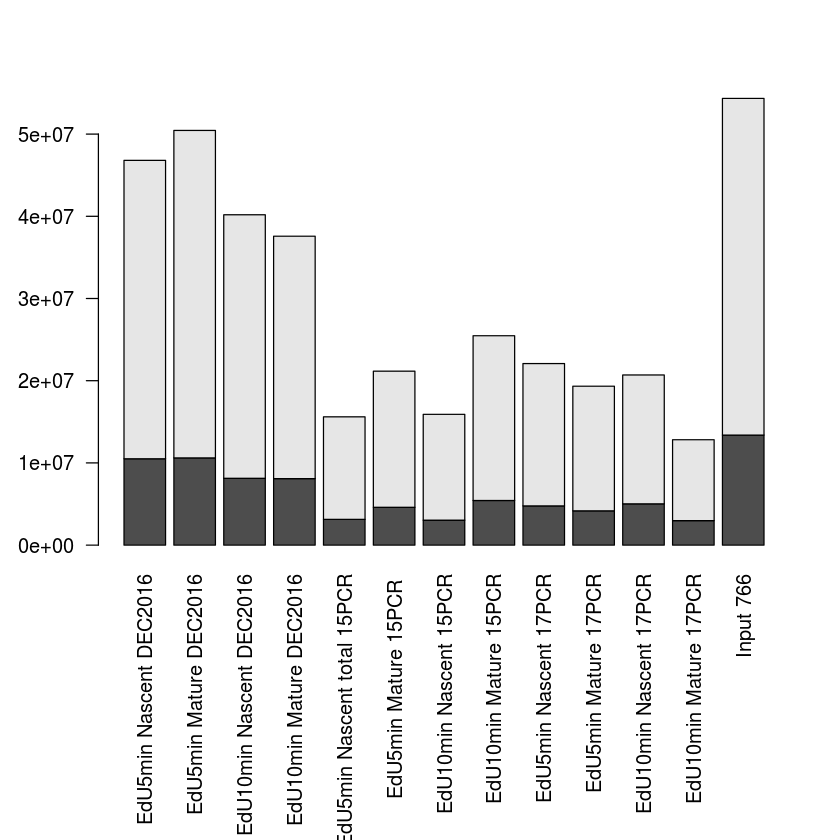

In [59]:
par(oma=c(7,0,0,0))
barplot(cc[1:2,], las=2)

In [68]:
cc12

c12,total.v,ratios
10507407,36297718,3.454489
10612905,39831415,3.753111
8127995,32054265,3.943687
8090916,29486121,3.644349
3131354,12473454,3.983406
4602741,16557222,3.597253
3035043,12874914,4.242086
5432058,20038281,3.688893
4773774,17313771,3.626852
4170168,15160887,3.635558


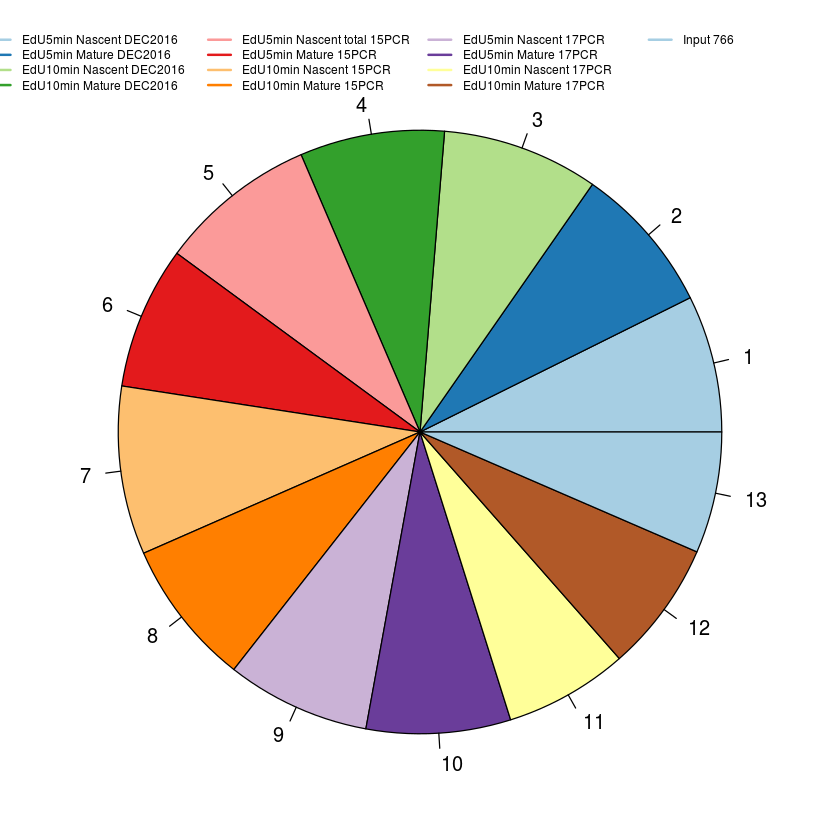

In [79]:
color_vector.v = brewer.pal(12, "Paired")
color.v = brewer.pal(12, "Paired")
#color_vector.v = rainbow(12)

par(mar=c(0,0,1,0))
pie(ratios, col=color.v, pch=16, xlim=c(0,12))
legend(x = "top", legend = dm_id.v, col = color_vector.v, lwd = 2, bty = "n", cex=0.6, ncol=4)
